In [1]:
from fbprophet import Prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def fn_get_date_df_of_reqd_len(reqd_len):
    '''
    function that creates a df with dates. Prophet needs input in a particular format. hence this step
    
    input:
        reqd_len: the length reqd for the output df
        also, we need a date_series.csv file on the machine which has just dates on one col
    
    output:
        output_df: data frame with dates as the only col
    '''
    if reqd_len > 0:
        output_df = pd.read_csv('date_series2.csv', nrows=reqd_len)
    else:
        output_df = None
    return output_df

In [48]:
def fn_do_pred_using_prophet(input_data_list, n_elem_to_ignore, k_predictions):
        '''
        input:
            input_data_list = list that contains the time series data 
            n_elem_to_ignore = last n number of elements in the input list that we don't want to use for forecast
            k_predictions = the number of prediction data points we want to make
            
        output:
            output_df = data frame with ds, yhat, lower and upper limits of yhat; yhat is the prediction
            predicted_df = full df with input and the predictions
            pred_values_list = list we are interested in
        '''
        
        len_of_ts = len(input_data_list) - n_elem_to_ignore
        
        df_for_prophet = fn_get_date_df_of_reqd_len(reqd_len=len_of_ts)
        
        #check if the n_elem variable is 0 or negative. we want it to be positive
        if n_elem_to_ignore == 0:
            df_for_prophet['y'] = input_data_list
        elif n_elem_to_ignore < 0:
            print "elem to ignore can't be negative"
            return None
        else:
            df_for_prophet['y'] = input_data_list[ : -(n_elem_to_ignore)]
        
        max_date_in_input = df_for_prophet.ds.max()
        
        n = Prophet()
        n.fit(df_for_prophet)

        future2 = n.make_future_dataframe(periods=k_predictions, freq='D')
        
        predicted = n.predict(future2)
        
        only_prediction = predicted[predicted.ds > max_date_in_input]
        
        output_df = pd.DataFrame()
        output_df['ds'] = only_prediction['ds']
        output_df['yhat'] = only_prediction['yhat']
        output_df['yhat_lower'] = only_prediction['yhat_lower']
        output_df['yhat_upper'] = only_prediction['yhat_upper']
        
        pred_values_list = output_df['yhat'].values
        
        return output_df, predicted[['ds','yhat','yhat_lower','yhat_upper']], pred_values_list

In [4]:
sine_wave_csv = pd.read_csv('LSTM_sine_wave_data.csv',names=['val'])
sine_wave_vals = list(sine_wave_csv.val)

In [21]:
len(sine_wave_vals)

5001

In [52]:
only_preds, full_df, op_list = fn_do_pred_using_prophet(input_data_list=sine_wave_vals,n_elem_to_ignore=0,k_predictions=200)

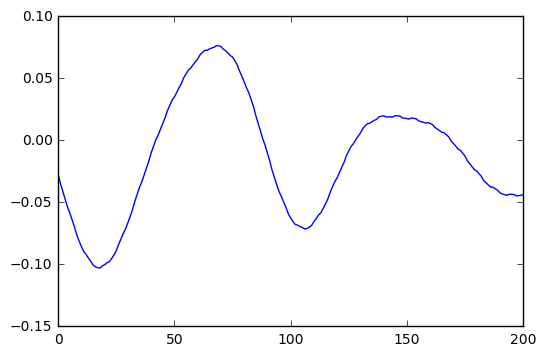

In [53]:
plt.plot(op_list)
plt.show()